In [25]:
import warnings
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Electric_Production.csv", index_col = "DATE", parse_dates=True)

In [5]:
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [6]:
data.tail()

,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [7]:
data.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [8]:
mt.rc("figure", figsize = (20,10))

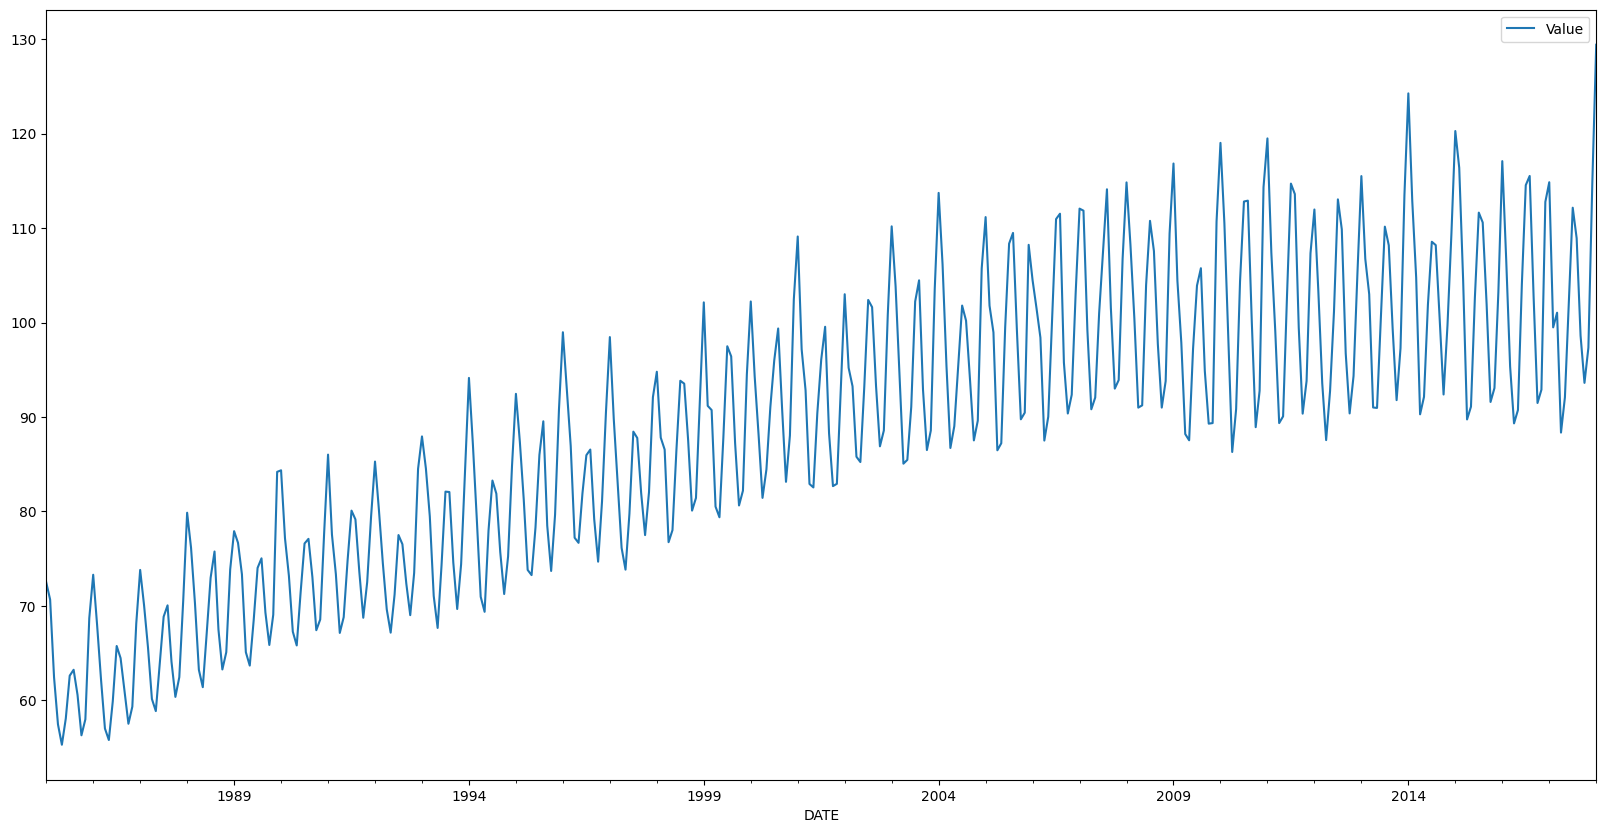

In [9]:
data.plot()
plt.show()

In [10]:
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [11]:
start_date = '1985-01-01'
end_date = '2010-01-01'
mask = (data.index >= start_date) & (data.index <= end_date)
data = data.loc[mask]

In [12]:
data.tail()

,Value
DATE,
2009-09-01,94.8823
2009-10-01,89.2977
2009-11-01,89.3585
2009-12-01,110.6844
2010-01-01,119.0166


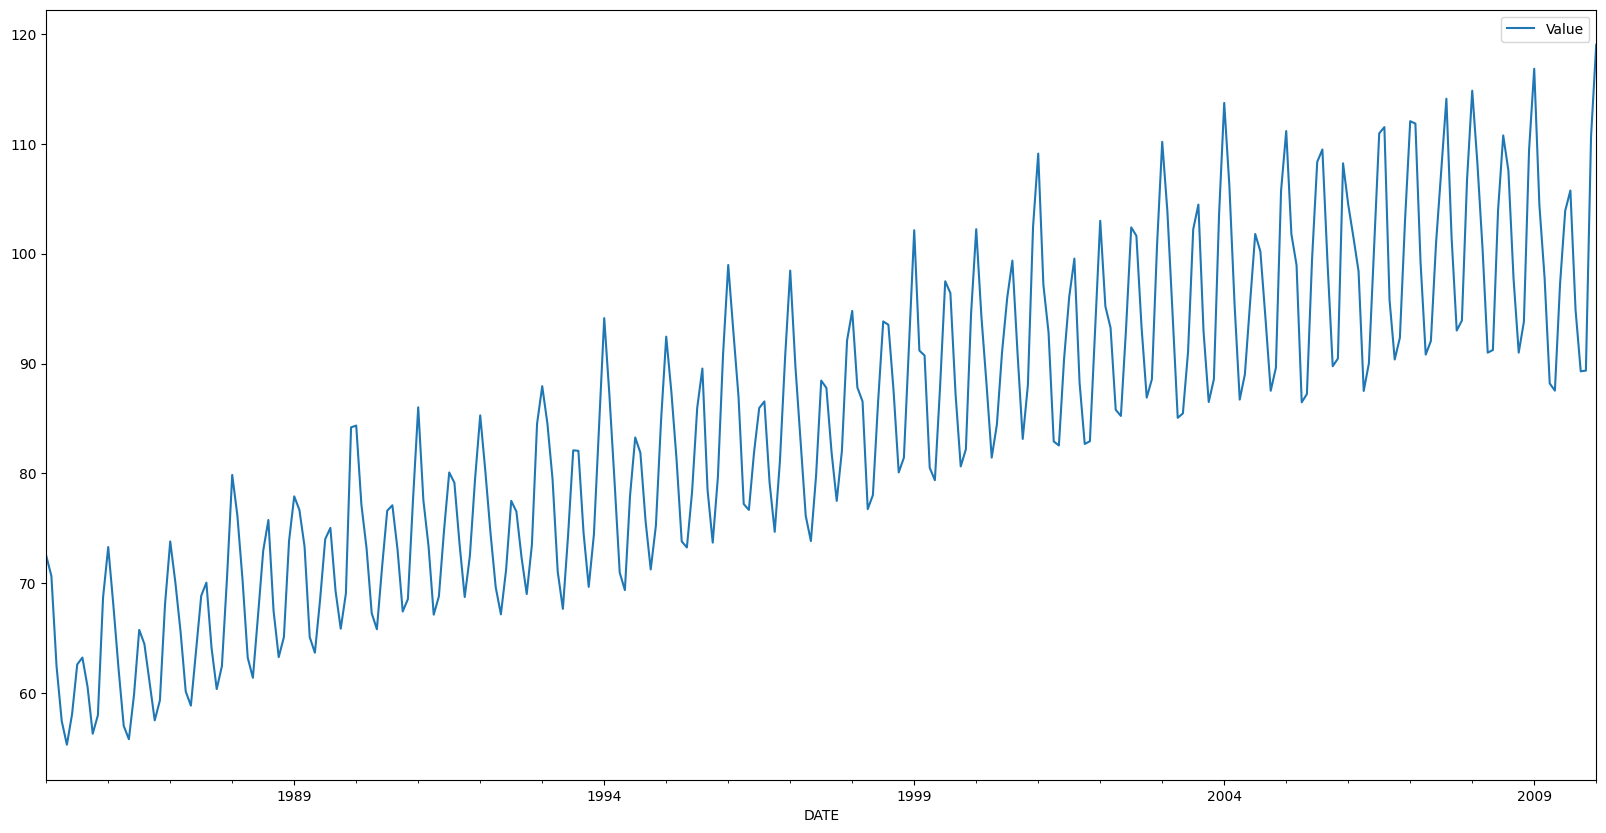

In [13]:
data.plot()
plt.show()

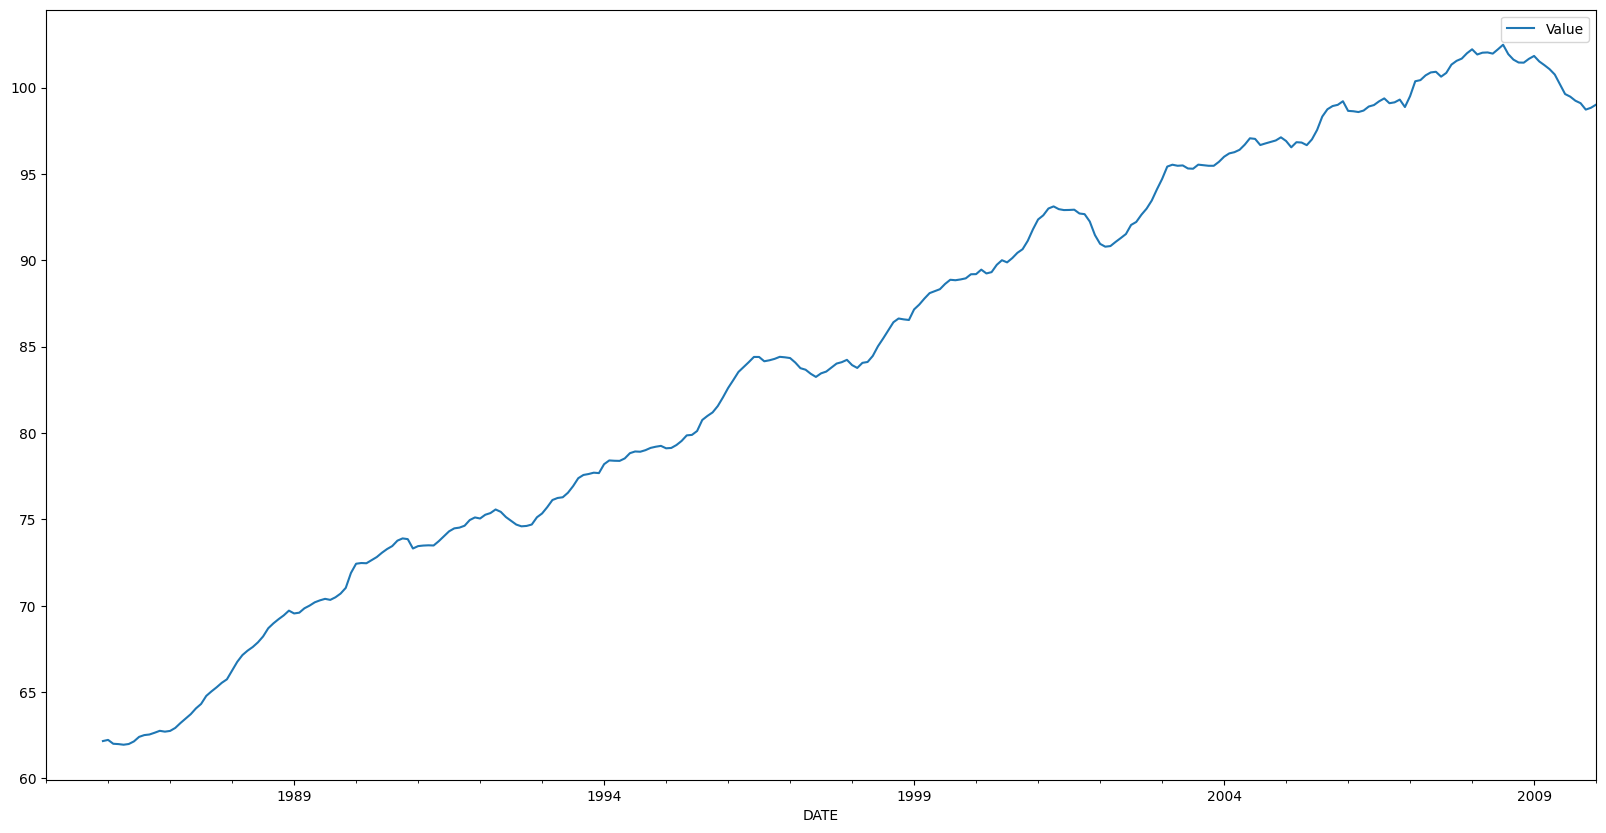

In [14]:
yearlydata = data.rolling(window=12).mean()
yearlydata.plot()
plt.show()

In [15]:
xcoords = ["1985-01-01","1986-01-01","1987-01-01","1988-01-01","1989-01-01","1990-01-01","1991-01-01","1992-01-01","1993-01-01","1994-01-01","1995-01-01","1996-01-01","1997-01-01","1998-01-01","1999-01-01","2000-01-01","2001-01-01","2002-01-01","2003-01-01","2004-01-01","2005-01-01","2006-01-01","2007-01-01","2008-01-01","2009-01-01",]

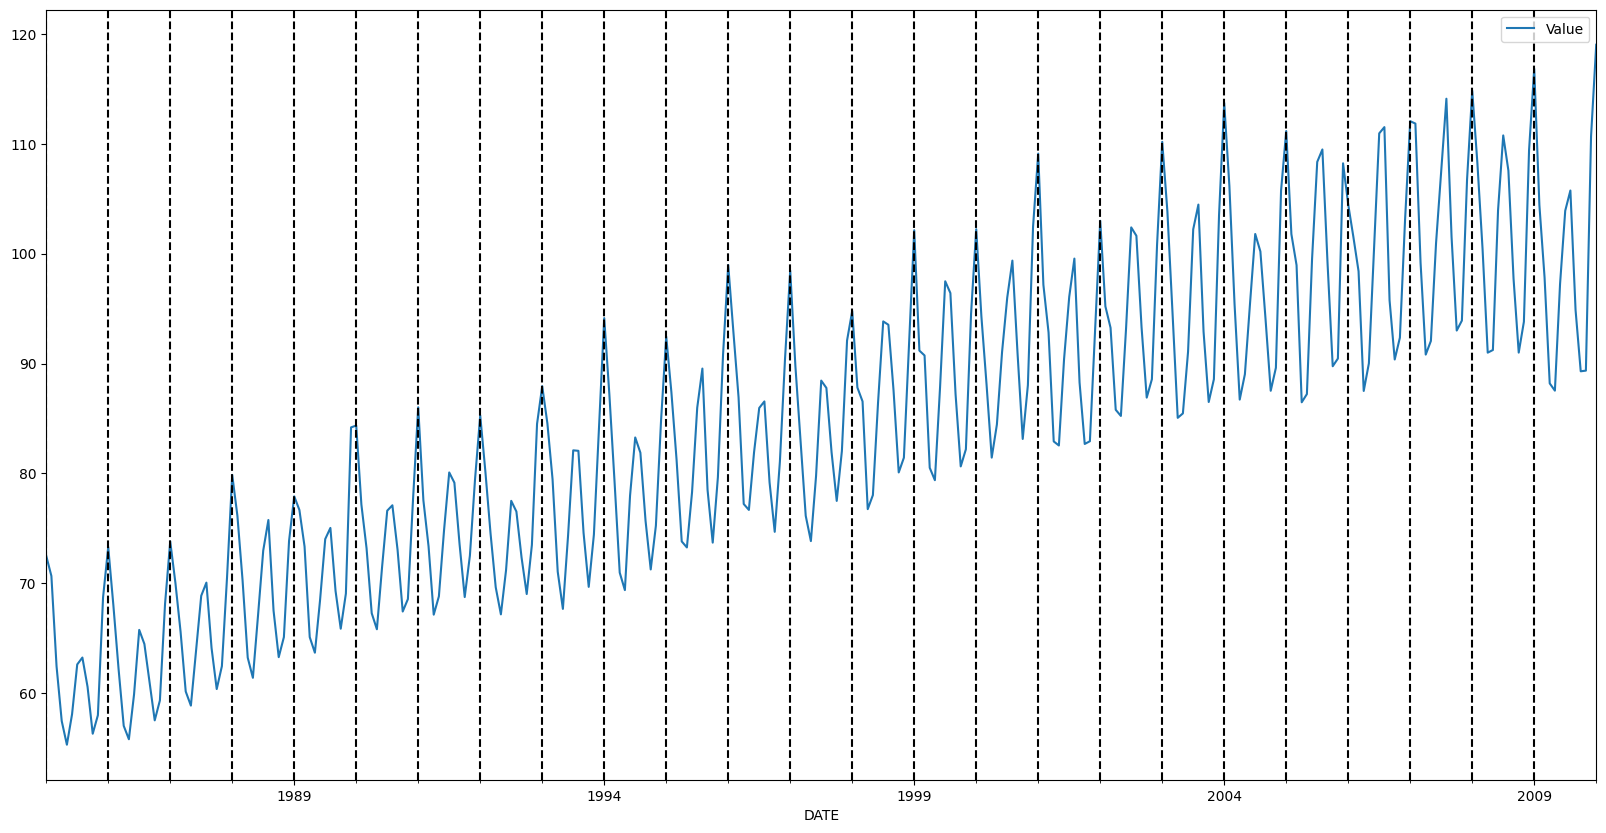

In [16]:
data.plot()
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle="--")
plt.show()

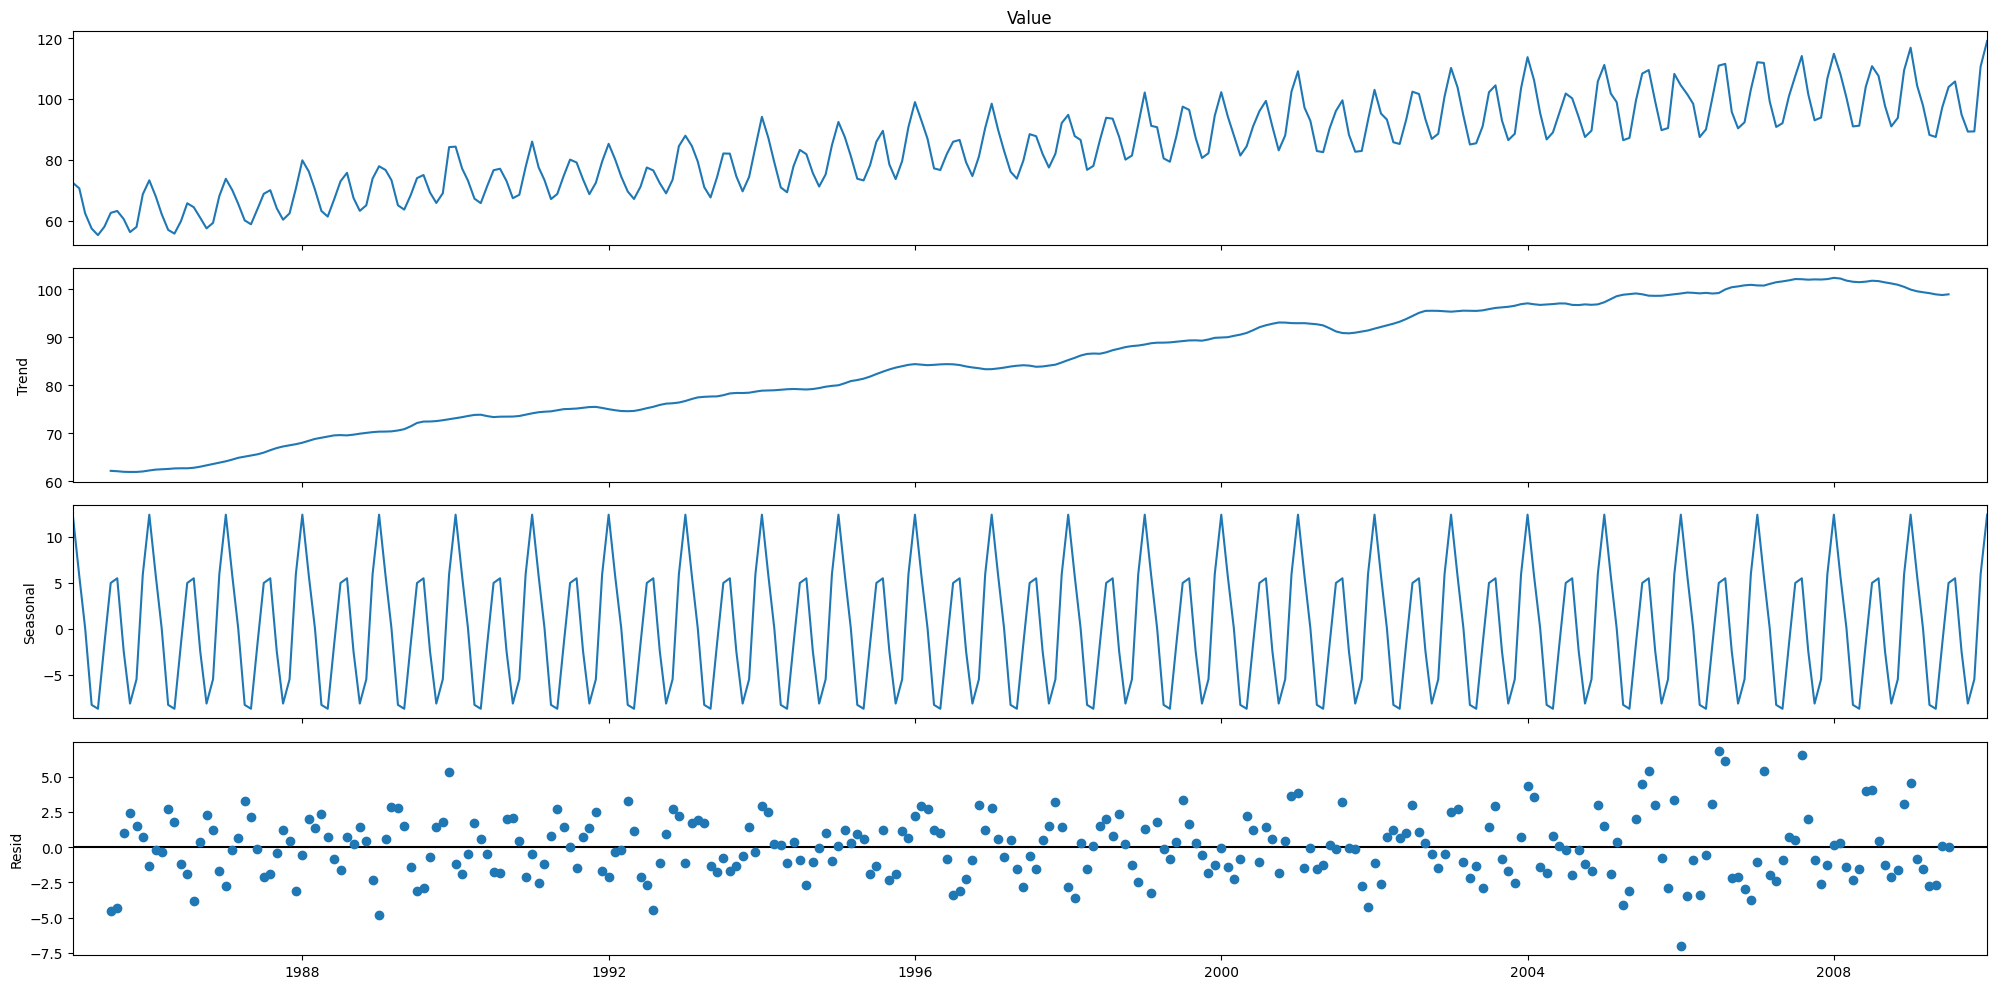

In [17]:
decompose = seasonal_decompose(data["Value"], model='additive')
decompose.plot()
plt.show()

In [20]:
def adf_test(series):
    result = adfuller((series), autolag='AIC')
    labels = ["ADF Test Statistic", 'p value', '# lags', '# observation']
    out = pd.Series(result[0:4], index=labels)
    print(out.to_string)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data has no unit root and stationary")
    else:
        print('Failed to reject null hypothesis')
        print('Data has unit root and non-stationary')

In [22]:
adf_test(data['Value'])

<bound method Series.to_string of ADF Test Statistic     -1.967267
p value                 0.301107
# lags                 15.000000
# observation         285.000000
dtype: float64>
Failed to reject null hypothesis
Data has unit root and non-stationary


In [28]:
aic_score = []
for index in range(1,30):
    model = AutoReg(data['Value'],lags=index)
    model_fitted = model.fit()
    aic_score.append(model_fitted.aic)

In [29]:
aic_score.index(min(aic_score))

28

In [33]:
model = AutoReg(data['Value'], lags=28)
model_fitted = model.fit()
print(model_fitted.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  301
Model:                    AutoReg(28)   Log Likelihood                -609.830
Method:               Conditional MLE   S.D. of innovations              2.259
Date:                Thu, 26 Dec 2024   AIC                           1279.660
Time:                        18:21:22   BIC                           1387.944
Sample:                    05-01-1987   HQIC                          1323.127
                         - 01-01-2010                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9178      1.233      3.177      0.001       1.500       6.335
Value.L1       0.5588      0.061      9.232      0.000       0.440       0.677
Value.L2      -0.1033      0.069     -1.487      0.1

In [37]:
fcast = model_fitted.predict(start=len(data), end=len(data)+24)

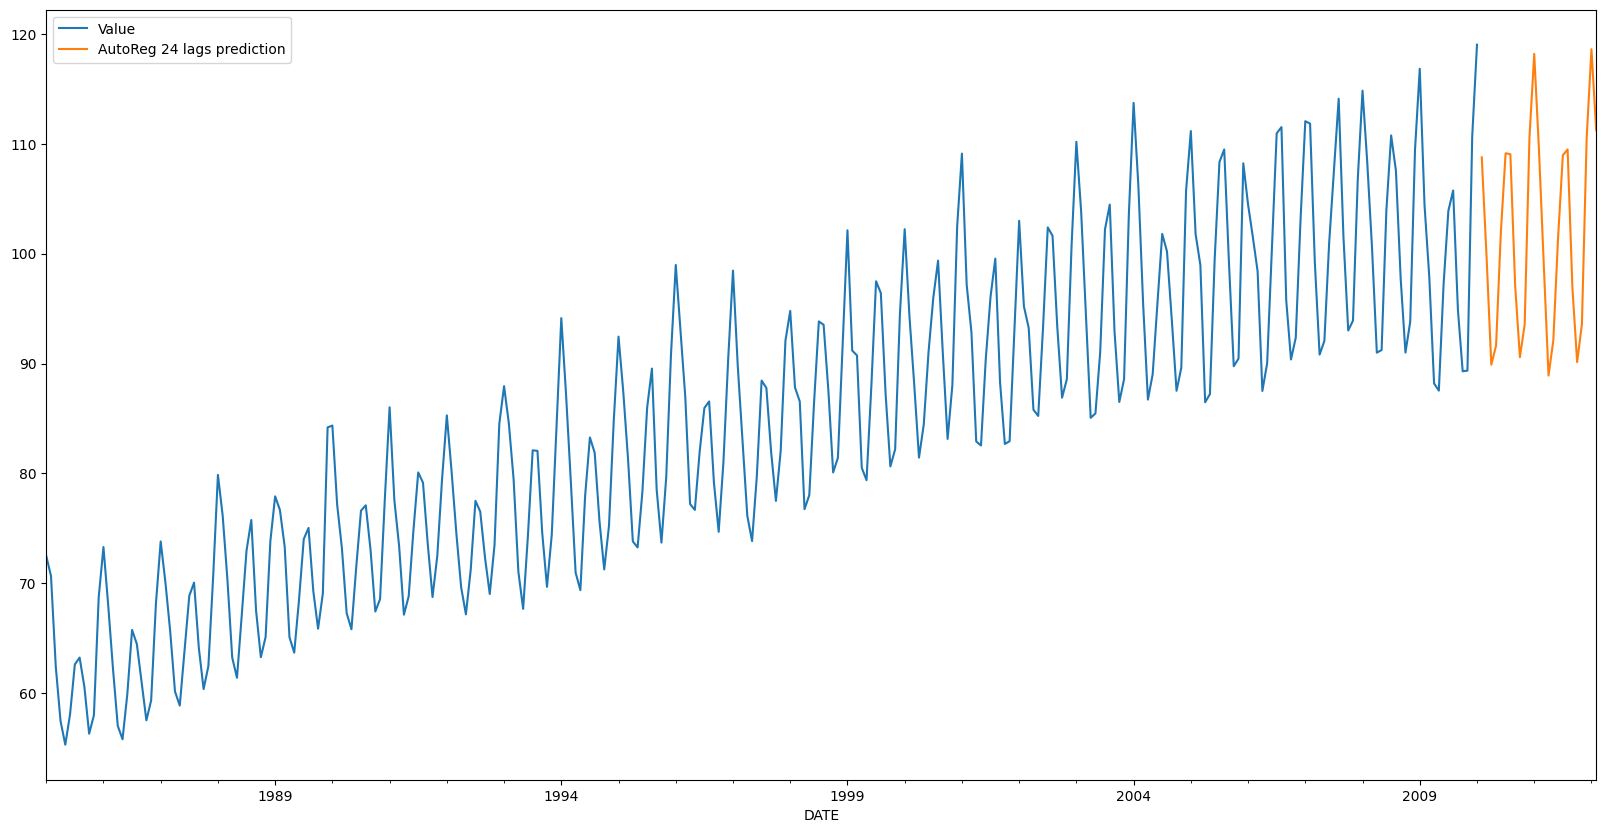

In [40]:
fcast = fcast.rename('AutoReg 24 lags prediction')
data.plot(legend=True)
fcast.plot(legend=True)
plt.show()